# Project Business Statistics: E-news Express

**Marks: 60**

<h2>Problem Statement and Objectives</h2>

## Problem statement

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

## Objective
Suppose i have been hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. I have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose, I randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'.I will Perform the statistical analysis to answer the following questions using the collected data.

1. Explore the dataset and extract insights using Exploratory Data Analysis.

2. Do the users spend more time on the new landing page than the existing landing page?

3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

4. Does the converted status depend on the preferred language? 

5. Is the time spent on the new page same for the different language users?


*Consider a significance level of 0.05 for all tests.*

The  idea  behind  answering  these  questions  is  to  decide  whether  the  new  page  is  effective  enough  to  gather  new subscribers for the news portal. We will perform the statistical analysis on the collected data to make the business decision.

### Data Description

The data contains the different data related to E-news Express. The detailed data dictionary is given below.

### Data Dictionary
1. user_id - This represents the user ID of the person visiting the website.

2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).

3. landing_page - This represents whether the landing page is new or old.

4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.

5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.

6. language_preferred - This represents the language chosen by the user to view the landing page.

## Let us start by importing all the necessary libraries

In [1]:
# import libraries for data manipulation
import pandas as pd
# library used for working with arrays.
import numpy as np

# library for plots and visualisations
from matplotlib import pyplot as plt
import seaborn as sns

#Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# command let the output of plotting commands is displayed inline within frontends like the Jupyter notebook
%matplotlib inline 

# this library contains a large number of probability distributions as well as a growing library of statistical functions.
import scipy.stats as stats

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [2]:
# write the code for reading the dataset abtest.csv
df = pd.read_csv('abtest.csv')


### Data Overview


In [3]:
# View a few rows of the data frame.
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
# view the shape of the overall data frame
df.shape

(100, 6)

**Observation:**
* DataFrame contain 100 rows and 6 columns.

In [5]:
# DataFrame for the visiotrs who visit the new landing page
df_n = df[df['landing_page'] == 'new']
print('Shape of the dataset who visit the new landing page is:',df_n.shape)
df_n.head()

Shape of the dataset who visit the new landing page is: (50, 6)


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


In [6]:
# DataFrame for the visiotrs who visit the old page
df_o = df[df['landing_page'] == 'old']
print('Shape of the dataset who visit the old landing page is:',df_o.shape)
df_o.head()

Shape of the dataset who visit the old landing page is: (50, 6)


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
3,546567,control,old,3.02,no,French
5,546558,control,old,5.28,yes,English
7,546581,control,old,6.53,yes,Spanish
9,546548,control,old,2.08,no,English


**Observations:**
* visitors who visit new landing page contains 50 rows and 6 columns.
* similarly, visitors who visit old page contains equal 50 rows and 6 columns..

In [7]:
# check the data types of the columns in the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


**Observations:**
* There is no missing values in the dataFrame columns.
* columns(group, landing_page, converted, language_preferred) contain object data types but those columns should be categorical.
    * converting "objects" to "category" reduces the space required to store the DataFrame. It also helps in analysis. 

### Fix object data types to categorical

In [8]:
df['group'] = df['group'].astype('category')
df['landing_page'] = df['landing_page'].astype('category')
df['converted'] = df['converted'].astype('category')
df['language_preferred'] = df['language_preferred'].astype('category')

In [9]:
# see the overall info of the DataFrame with types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


**Observations:**
* There are 100 rows and 6 columns in the DataFrame.
* Out of six columns four are categorical, one is int and one is float type.
* Object columns(group,landing_page,converted,language_preffered) has converted to categorical columns.
* Memory usage is optimised from 4.8+ KB to 2.6 KB.

### Checking Missing values in the DataFrame

In [10]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

**Observations:**
* There is no missing values in the dataFrame.

### Summary statistics of the DataFrame 

In [11]:
# Statistics of Numerical columns of the dataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


**Observations:**
* On Average people spend 5.3778 minutes in the ENews_Express site where visitor spend minimum 0.19 min to max 10.71 minutes.

In [12]:
# Statistics of categorical columns of the dataFrame
df.describe(exclude=np.number).T

,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,new,50
converted,100,2,yes,54
language_preferred,100,3,French,34


In [13]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

In [14]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

In [15]:
df['language_preferred'].value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

In [16]:
df['landing_page'].value_counts()

new    50
old    50
Name: landing_page, dtype: int64

**Observations**
* There are 100 unique users.
* There are 2 unique groups - control and treatment. Each group consists of 50 users.
* There are 2 landing_pages - new and old.Both of the page contain equal observations.
* Overall, 54 users get converted and 46 users do not get converted after visiting the landing page.
* There are 3 unique preferred languages - English, French, and Spanish.Among those most preffered language is French and spanih which is appeared 34 times. 

### Exploratory Data Analysis (EDA)

**We have developed two functions to observer the data for exploratory analysis.**
  - **histogram_boxplot()** for numerical variables analysis which gives a historam and boxplot
  - **Labeled_barplot()** to observe categorical variables which gives barplot

**Function to plot a boxplot and a histogram along the same scale**

In [17]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**Function to create labeled barplots for categorcial data analysis**

In [18]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

Univariate analysis involves the analysis of a single variable.

#### Time spent on the page

In [19]:
df.sample(5)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
90,546477,treatment,new,5.40,no,French
19,546549,control,old,3.88,yes,English
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
78,546486,treatment,new,9.12,yes,French


*Time Spent on the new landing page*

In [20]:
# time_spent_on_the_page for the new landing page
df_new_time = df[df['landing_page'] == 'new']['time_spent_on_the_page']
df_new_time.describe()

count    50.000000
mean      6.223200
std       1.817031
min       1.650000
25%       5.175000
50%       6.105000
75%       7.160000
max      10.710000
Name: time_spent_on_the_page, dtype: float64

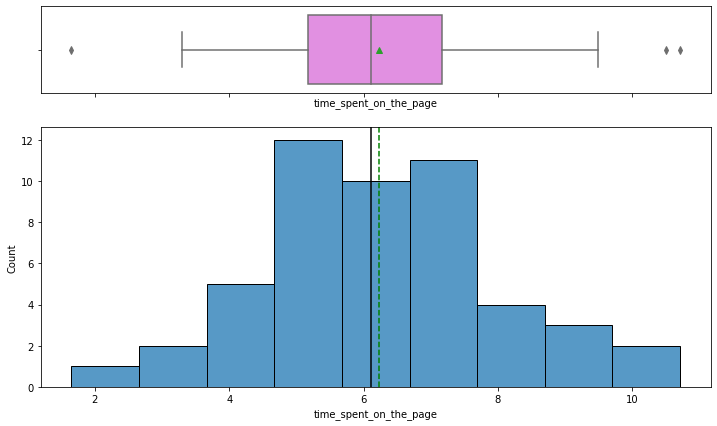

In [21]:
# DataFrame for the visiotrs who visit the new landing page
df_n = df[df['landing_page'] == 'new']
# Calling user defined function histogram_boxplot()to see the distribution of time_spent_on_the_page for new landing page
histogram_boxplot(df_n,'time_spent_on_the_page')

*Time Spent on the old page*

In [22]:
# time_spent_on_the_page for the old page
df_old_time = df[df['landing_page'] == 'old']['time_spent_on_the_page']
df_old_time.describe()

count    50.000000
mean      4.532400
std       2.581975
min       0.190000
25%       2.720000
50%       4.380000
75%       6.442500
max      10.300000
Name: time_spent_on_the_page, dtype: float64

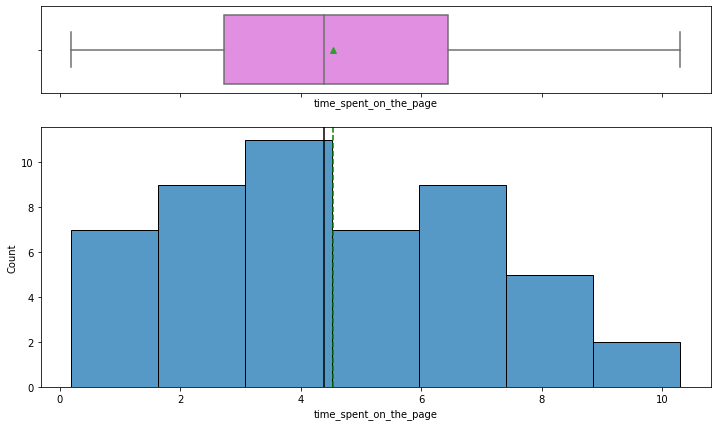

In [23]:
# DataFrame for the visiotrs who visit the old page
df_o = df[df['landing_page'] == 'old']
# Calling user defined function histogram_boxplot()to see the distribution of time_spent_on_the_page for old page
histogram_boxplot(df_o,'time_spent_on_the_page')

**Observations:**

* visitors spend average 6.2232 minutes on the new landing page.
* visitors spend minimum 1.82 minutes to maximum 10.71 minutes in new landing page 
* visitors spend average 4.5324 minutes on the old page.
* visitors spend minimum 0.19 minute to maximum 10.3 minutes in old page 

#### Group

In [24]:
# Define how many visitors belongs to which group
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

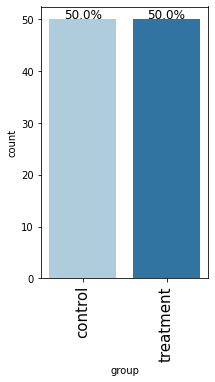

In [25]:
# call user defined function labeled_barplot() to see the distribution of the categorical variable
labeled_barplot(df,'group',perc = True)

**Observations:**
* The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group).
* Dataset contains equal 50% observations for both the group.

#### Landing page

In [26]:
# Define how many visitors belongs to different landing page
df['landing_page'].value_counts()

new    50
old    50
Name: landing_page, dtype: int64

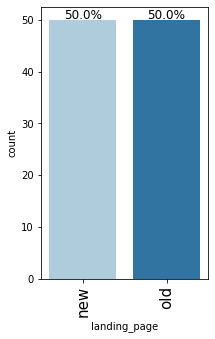

In [27]:
# call user defined function labeled_barplot() to see the distribution of the categorical variable
labeled_barplot(df,'landing_page',perc = True)

**Observation:**
* New design landing page and old page contain equal 50% observations.

#### Converted

In [28]:
# Define how many visitors converted to subscriber
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

*Visitors converted to subscriber in new landing page*

yes    33
no     17
Name: converted, dtype: int64


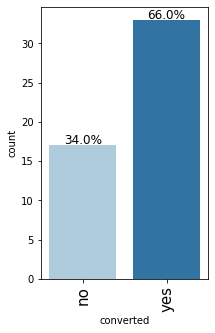

In [29]:
# print the number of visitors converted to subscriber in new page
print(df[df['landing_page']=='new']['converted'].value_counts())
# User defined function to show the percentage of visitors as a subscriber in new landing page
labeled_barplot(df_n,'converted',perc = True)

*Visitors converted to subscriber in old landing page*

no     29
yes    21
Name: converted, dtype: int64


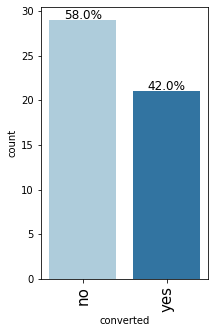

In [30]:
# print the number of visitors converted to subscriber in old page
print(df[df['landing_page']=='old']['converted'].value_counts())
# User defined function to show the percentage of visitors as a subscriber in old landing page
labeled_barplot(df_o,'converted',perc = True)

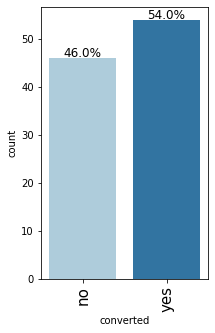

In [31]:
# user defined function to analyze conversion rate on overall 100 sample dataset
labeled_barplot(df,'converted',perc = True)

**Observations:**
- Yes means converted to subscriber after visiting the page and no means did not convert to subscriber.
- In overall dataset, 54% visitor converted to subscriber and 46% visitors do not.
- In a  new landing page, 66% subscriber converted to subscriber after visiting the page and 34% do not.
- In a old landing page, 42% percent converted to subscriber whereas 58% do not.

#### Preferred language

In [32]:
# Define how many visitors views the page to which language on overall 100 sample dataset
df['language_preferred'].value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

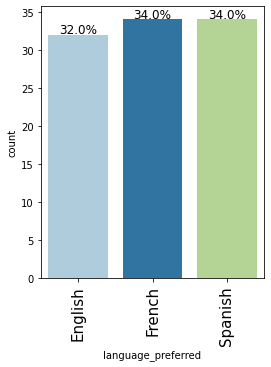

In [33]:
labeled_barplot(df,'language_preferred',perc = True)

*Preferred language in new landing page*

French     17
Spanish    17
English    16
Name: language_preferred, dtype: int64


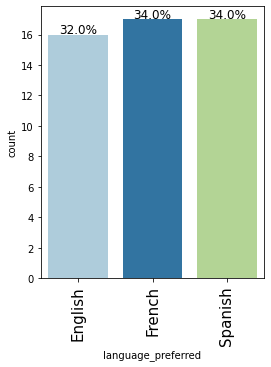

In [34]:
# print the number of visitors who choose different language to view landing page
print(df_n['language_preferred'].value_counts())
# User defined function to show the percentage of visitors who choose different language to view new landing page
labeled_barplot(df_n,'language_preferred',perc = True)

*Preferred language in old page*

French     17
Spanish    17
English    16
Name: language_preferred, dtype: int64


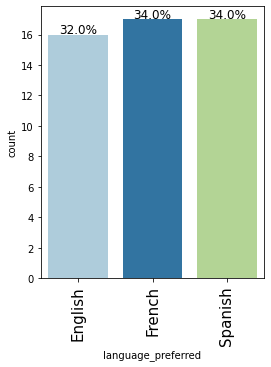

In [35]:
# print the number of visitors who choose different language to view landing page
print(df_o['language_preferred'].value_counts())
# User defined function to show the percentage of visitors who choose different language to view new landing page
labeled_barplot(df_o,'language_preferred',perc = True)

**Observations:**
- visitor either choose Spanish, French or English to view the landing page.
- In overall dataset, 34% visitors equally choose spanish and French whereas 32% visitors choose English to view the landing page.
- In new landing page and also old landing page shows that 34% visitors equally choose spanish and French whereas 32% choose English to view their landing page.

### Bivariate Analysis

Bivariate analysis is the simultaneous analysis of two variables (attributes). 

#### Landing page vs Time spent on the page

In [36]:
# total time spent on the new and old landing page
df[['landing_page','time_spent_on_the_page']].groupby(by='landing_page').sum()

,time_spent_on_the_page
landing_page,
new,311.16
old,226.62


In [37]:
# Average time spent on the new and old landing page
df[['landing_page','time_spent_on_the_page']].groupby(by='landing_page').mean()

,time_spent_on_the_page
landing_page,
new,6.2232
old,4.5324


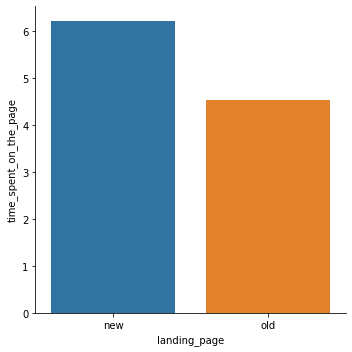

In [38]:
# Barchart shows average time spent on the page by new and old landing page
sns.catplot(data = df, y = 'time_spent_on_the_page', x = 'landing_page', kind = 'bar',ci = None)
plt.show()

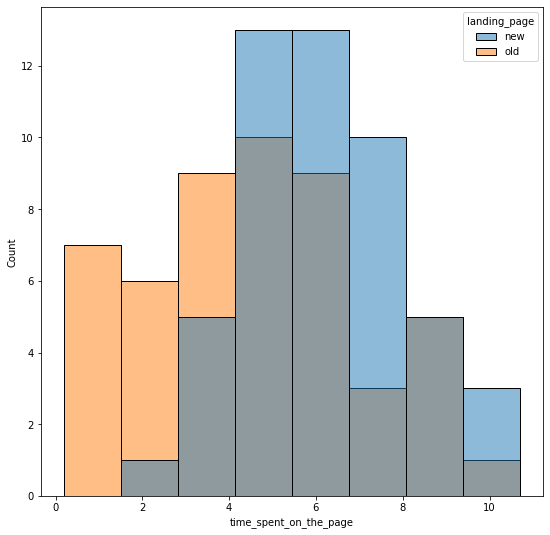

In [39]:
plt.figure(figsize=(9, 9))
sns.histplot(data = df, x = 'time_spent_on_the_page', hue = 'landing_page')
plt.show()

**Observations:**
- visitors spend average 6.2232 minutes in new landing page and 4.53 minutes in old page.
- Basing on the collection sample, visitor spend total 311.16 minutes in new page and 226.32 minutes in old page.
- From the graph, we see that visitors spend more time in the new landing page than old one.


#### Conversion status vs Time spent on the page

In [40]:
# total time spent by visitors either visitors converted or not to a subscriber
df[['converted','time_spent_on_the_page']].groupby(by='converted').sum()


,time_spent_on_the_page
converted,
no,180.13
yes,357.65


In [41]:
# Average time spent by visitors either visitors converted or not to a subscriber
df[['converted','time_spent_on_the_page']].groupby(by='converted').mean()

,time_spent_on_the_page
converted,
no,3.915870
yes,6.623148


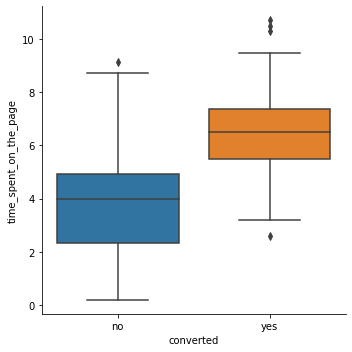

In [42]:
# Boxplot to understand the relationship between 'time_spent_on_the_page' and 'converted' columns
sns.catplot(x="converted", y="time_spent_on_the_page", kind="box", data=df)
plt.show()

**Observations:**
- visitors who converted to subscriber spend moretime(total time 357.65 mins) compare to who do not(total time 180.13mins)
- visiotrs who converted to subscriber spend average 6.623 minutes and on the other hand visitors who visit average 3.92 minutes do not converted to a subscriber.
- If a visitor spend average 6.62 minutes then he/she becomes subscriber.

#### Preferred language vs Time spent on the page

In [43]:
# Overall mean time spent on the webpage which includes new and old landing page
df[['language_preferred','time_spent_on_the_page']].groupby(by = 'language_preferred').mean()

,time_spent_on_the_page
language_preferred,
English,5.559062
French,5.253235
Spanish,5.331765


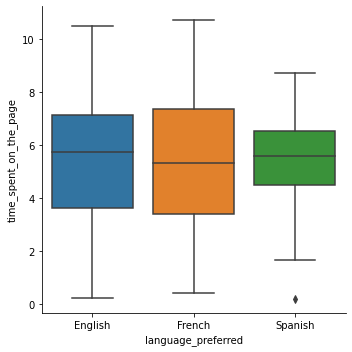

In [44]:
# Boxplot to see the distributions of overall dataset  on different language which includes new and old landing page
sns.catplot(x="language_preferred", y="time_spent_on_the_page", kind="box", data=df)
plt.show()

*Preferred language vs time spent on the new landing page*

In [45]:
# Overall total time spent on the new landing page by differnet language
df_n[['language_preferred','time_spent_on_the_page']].groupby(by = 'language_preferred').sum()


,time_spent_on_the_page
language_preferred,
English,106.62
French,105.34
Spanish,99.20


In [46]:
# Overall mean time spent on the new landing page by different language
df_n[['language_preferred','time_spent_on_the_page']].groupby(by = 'language_preferred').mean()

,time_spent_on_the_page
language_preferred,
English,6.663750
French,6.196471
Spanish,5.835294


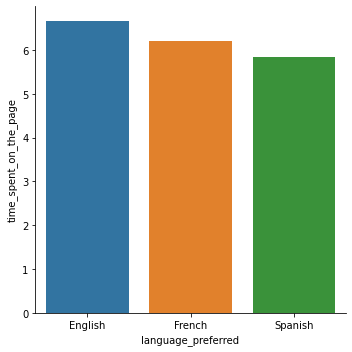

In [47]:
# Barchart shows average time spent on the new page by different language
sns.catplot(data = df_n, y = 'time_spent_on_the_page', x = 'language_preferred', kind = 'bar',ci = None)
plt.show()

*Preferred language vs time spent on the old landing page*

In [48]:
# Overall total time spent on the old landing page by differnet language
df_o[['language_preferred','time_spent_on_the_page']].groupby(by = 'language_preferred').sum()

,time_spent_on_the_page
language_preferred,
English,71.27
French,73.27
Spanish,82.08


In [49]:
# Overall mean time spent on the old landing page by different language
df_o[['language_preferred','time_spent_on_the_page']].groupby(by = 'language_preferred').mean()

,time_spent_on_the_page
language_preferred,
English,4.454375
French,4.310000
Spanish,4.828235


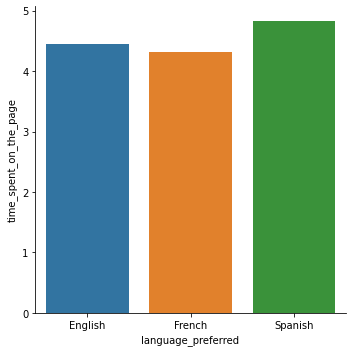

In [50]:
# Barchart shows average time spent on the old page by different language
sns.catplot(data = df_o, y = 'time_spent_on_the_page', x = 'language_preferred', kind = 'bar',ci = None)
plt.show()

**Observations:**
- In overall dataset(new and old landing page),visitors who view page in english spend average 5.56 minutes compare to visitors who choose different language like spanish(5.33 minutess) and French(5.25 minutes)
- In overall dataset, visitors who choose Spanish(total time 181.2 minutes) and French(total time 178.6 minutes) spend more total time compare to visitors who choose english(total time 177.89 minutes) language.
- But in new landing page,visitors who view page in english spend more average time(mean time 6.67 minutes) compare to spanish(5.85 minutes) and French(6.20 minutes)
- But in old page, visitors who view page in spanish spend more average time(4.82 minutes) compare to French(4.31 minutes) and English(4.45 minutes)

## 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)

### Perform Visual Analysis

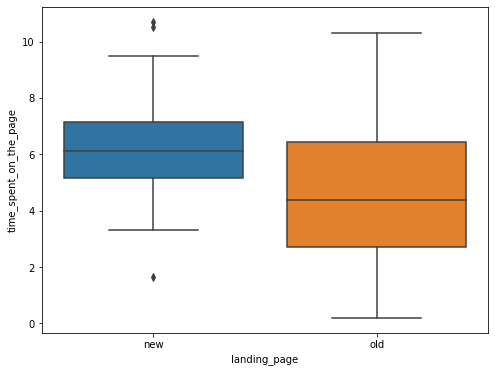

In [51]:
# visual analysis of the time spent on the new page
# and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

### Step 1: Define the null and alternate hypotheses


Let $\mu_1, \mu_2$ be the mean time spent by the visitors on new landing page and old page respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. **Based on this information, we will select two sample T-test**.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [52]:
# create subsetted data frame for new landing page users 
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
# create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']


In [53]:
# find the sample means for the two samples
print('The sample mean of the time spent on the new webpage is: ', round(time_spent_new.mean(),2))
print('The sample mean of the time spent on the old webpage is: ',round(time_spent_old.mean(),2))
# find the sample standard deviations for the two samples
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

The sample mean of the time spent on the new webpage is:  6.22
The sample mean of the time spent on the old webpage is:  4.53
The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, time_spent_on_the_page is measured on a continuous scale.
* Normally distributed populations - Yes, since the central limit theorem states that if the sample size is > 30 then it follows a normal distribution regardless of the shape of the population distribution.Both new landing page and old landing page have 50 samples.
* Independent populations - As we are taking random samples for two different groups(control group and treatment group), the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

so, We can use two sample T-test for this problem.

### Step 5: Calculate the p-value

In [54]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [55]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference


As the p-value (~0.0001) is less than the level of significance, we can reject the null hypothesis.so, we do have enough evidence to support the claim that new landing page shows a higher population mean time than the old landing page.Hence, we can say users spend more time on the new landing page than the old page.

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)

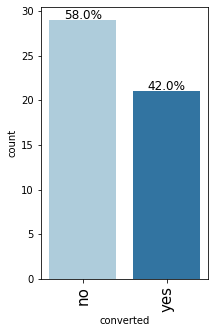

In [56]:
# conversion rate for the old page 
df_control = df[df['group'] == 'control']
labeled_barplot(df_control,'converted',perc = True)

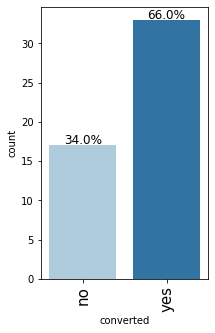

In [57]:
# conversion rate for the new page
df_treatment = df[df['group'] == 'treatment']
labeled_barplot(df_treatment,'converted',perc = True)

### Step 1: Define the null and alternate hypotheses

Let $p_1,p_2$ be the proportions of visitors who converted to subscriber in new and old page.

we will test the null hypothesis

>$H_0:p_1 =p_2$ = 0.50

against the alternate hypothesis

>$H_a:p_1 > p_2$

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population proportions from two independent populations. **Based on this information, we will select two proportion z-test**.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [58]:
# calculate the number of converted visitors in the treatment group/new landing page
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
print('new_converted:',new_converted)
# calculate the number of converted visitors in the control group/old landing page
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']
print('old_converted:',old_converted)
n_control = df.group.value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group
print('The numbers of users served the new and old pages are {0} and {1} respectively.'.format(n_control, n_treatment ))

new_converted: 33
old_converted: 21
The numbers of users served the new and old pages are 50 and 50 respectively.


### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a visitor either converted to subscriber or not.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n is the sample size and p1,p2 represent the sample proportion of visitors who converted to subscriber for new and old page respectively.
>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $

### Step 5: Calculate the p-value

In [59]:
# importing the required function
from statsmodels.stats.proportion import proportions_ztest 
# calculating the p-value
test_stat, p_value = proportions_ztest([33, 21], [50, 50], alternative = 'larger')   

print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [60]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

As the p-value is much smaller than the significance level 0.05, we reject the null hypothesis. Thus, we have enough statistical significance to claim that conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page.

## 4. Is the conversion and preferred language are independent or related? (10 Marks)

### Perform Visual Analysis

English    21
Spanish    18
French     15
Name: language_preferred, dtype: int64


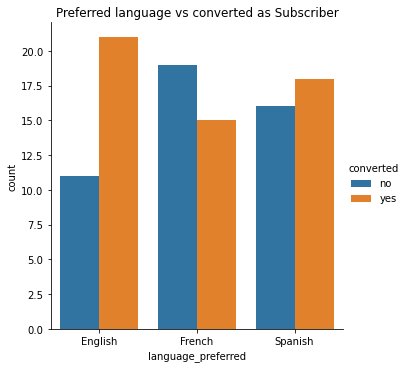

In [61]:
# print language_preferred for the number of visitors who converted to subscriber on whole dataset
print(df[df['converted'] == 'yes']['language_preferred'].value_counts())
# visually show language prefer vs conversion to a subscriber on whole sample dataset
sns.catplot(x = 'language_preferred', data=df, kind='count',hue ='converted').set(title='Preferred language vs converted as Subscriber')
plt.show()


French     12
Spanish    11
English    10
Name: language_preferred, dtype: int64


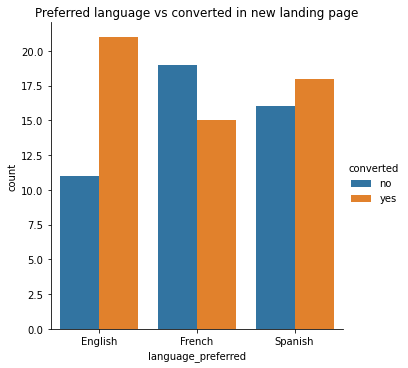

In [62]:
# print language_preferred for the number of visitors who converted to subscriber on new landing page
print(df_n[df_n['converted'] == 'yes']['language_preferred'].value_counts())
# visually show language prefer vs conversion to a subscriber on new landing page
sns.catplot(x = 'language_preferred', data=df, kind='count',hue ='converted').set(title='Preferred language vs converted in new landing page')
plt.show()

In [63]:
# print language_preferred for the number of visitors who converted to subscriber on old landing page
df_o[df_o['converted'] == 'yes']['language_preferred'].value_counts()

English    11
Spanish     7
French      3
Name: language_preferred, dtype: int64

### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis

>$H_0:$ conversion to subscriber is independent of preferred language.

against the alternate hypothesis

>$H_a:$ conversion to subscriber depends on preferred language.

### Step 2: Select Appropriate test

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. **Based on this information, we will select Chi-Square Test for Independence.**

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [64]:
# complete the code to create a contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['converted'],df['language_preferred'])  

#contingency_table
observed_data = contingency_table.values
observed_data

array([[11, 19, 16],
       [21, 15, 18]], dtype=int64)

### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

### Step 5: Calculate the p-value

In [65]:
# importing the required function for chi square test
from scipy.stats import chi2_contingency

# calculate the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(observed_data)  

print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [66]:
# conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

As the p-value is much higher than the significance level, we fail to reject the null hypothesis. Hence, we do have enough statistical significance to conclude that conversion as a subsriber is not depending on the preferred language at 5% significance level.

## 5. Is the time spent on the new page same for the different language users? (10 Marks)

### Perform Visual Analysis

In [67]:
# DataFrame that describe the new landing page
df_n.head()


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


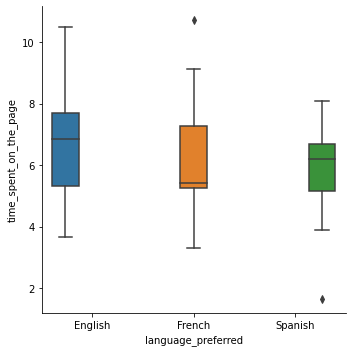

In [68]:
# Code to visually plot the time spent on the new page for different language users
sns.catplot(x="language_preferred", y="time_spent_on_the_page", kind="box", data=df_n, hue='language_preferred')
plt.show()

In [69]:
# observe 5 random data on new landing page
df_n.sample(5)


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
38,546487,treatment,new,1.65,no,Spanish
2,546462,treatment,new,4.40,no,Spanish
51,546457,treatment,new,5.65,no,English
16,546443,treatment,new,8.73,no,English
26,546469,treatment,new,9.49,yes,English


Here, time_spent_on_the_page is the response and language_preferred is the factor.

In [70]:
# get the number of  levels of factor for  language_preferred
df_n['language_preferred'].value_counts()

French     17
Spanish    17
English    16
Name: language_preferred, dtype: int64

In [71]:
# write the code to calculate the mean time spent on the new landing page for different language users
df_n.groupby(by = 'language_preferred').mean()

,user_id,time_spent_on_the_page
language_preferred,,
English,546461.875000,6.663750
French,546466.647059,6.196471
Spanish,546473.647059,5.835294


### Step 1: Define the null and alternate hypotheses

### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the new landing page for English, French and Spanish respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one of mean time spent on the new page is different from the rest.

### Step 2: Select Appropriate test

This is a problem, concerning three population means. **so, we will use one way Anova test to compare the three population means.** Also,we will also check the assumptions of normality and equality of variance for the three groups(English, French, Spanish)

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the new page follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on the new page does not follow a normal distribution

In [72]:
# Assumption 1: Normality
# import the required function
from scipy.stats import shapiro

# find the p-value
w, p_value = shapiro(df_n['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis. so time spent on the new landing page follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal.

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest.

In [73]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df_n[df_n['language_preferred']=="English"]['time_spent_on_the_page'], 
                             df_n[df_n['language_preferred']=="French"]['time_spent_on_the_page'], 
                             df_n[df_n['language_preferred']=="Spanish"]['time_spent_on_the_page'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis.so, all the population variances are equal.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [74]:
# create a subsetted data frame of the time spent on the new page by English language users 
time_spent_English = df_n[df_n['language_preferred']=="English"]['time_spent_on_the_page']
# create subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_French =  df_n[df_n['language_preferred']=="French"]['time_spent_on_the_page']  
time_spent_Spanish = df_n[df_n['language_preferred']=="Spanish"]['time_spent_on_the_page']   

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

### Step 5: Calculate the p-value

In [75]:
# import the required function
from scipy.stats import f_oneway

# calculate the p-value
test_stat, p_value = f_oneway(time_spent_English,time_spent_French,time_spent_Spanish)   

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [76]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

As the p-value is much higher than the significance level, we fail to reject the null hypothesis. Hence, we do have enough 
statistical significance to conclude that time spent on the new page is not depending on the preferred language at 5% significance level.

## Conclusion 

The design team of the ENews express has designed a new landing page.As a data scientist, the task  is to decide whether the new landing page is more effective to gather new subscribers or not than the old page.The overall business success of the E-news express is depending on which landing page of E-news express is driving more subscribers. Accordingly, The overall pivot business decision is depending on to decide whether to go for new landing page or continue with the old one.Decision makers of the ENews express will opt for suitable page(either new landing page or old one) basing on the analysis of the data scientist.

To support the critical decision, statistical analysis was conducted to answer the following questions using the collected data and we came to know the answer based on statistical analysis.
* Do the users spend more time on the new landing page than the existing landing page?
    - At the 5% significance level, there is sufficient evidence to support the claim that visitors spend more time on the new landing page than the existing landing page.
* Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
    - At the 5% significance level, there is sufficient evidence to support the claim that conversion rate (the proportion of users who visit the landing page and get converted) for the new landing page greater than the conversion rate for the old page.
* Does the converted status depend on the preferred language? 
    - At the 5% significance level, there is sufficient evidence to support the claim that conversion does not depend on the preferred language. 
* Is the time spent on the new page same for the different language users?
    - At the 5% significance level, there is sufficient evidence to support the claim that time spent on the page is not depending on the preferred language.

Hence, we can say that visitor spend much more time on new landing page than the old page.Additinally, new landing page shows greater conversion rate than the old page.Besides,we have enough statistical evidence to claim that, conversion as a subscriber is not depending on the prefered language and preferred language is not dictating the time spent on the web page.


<h2 id = "recom">Business Recommendations:</h2>

**1.  Visitors spend much more time on new landing page than the old one. so, new landing page is much more user friendly than the older one.**


**2.  New landging page shows greater conversion rate to a subscriber than the old page.**


**3. Since, conversion as a subscriber as well as time spent on the page is not depending on whether visitors viewed their page as English, French or spanich language. so, company may keep options for more differnt languages to see whether it increases more subscriber or not.**


**4. From the data analysis it was found that if a visitor spend average 6.62 minutes time on a page then he/she becomes subscriber. so, design team should make landing page more user friendly and interactive so that visitor spend more time.**


**5. In a new landing page, visitors spend more time(Average 6.62 minutes) than the old page(Average approx 4 minutes). so, new landing page might be more interactive than the old page**


**6. There are features that every online news portal or website design should have.Decision makers can make sure whether new landing page has these features or not:**

   - **Easy to navigate design:** visitors more likely to visit easy navigation web page. 
   - **Responsive news portal design:** Readers get top expreience when news portal is responsive to their laptops, tablets, and mobile phones.so it drivers more visitors.
   - **Customised news portal design:** Provides readers with the possibility to customize their page giving them the power to choose sections, contents, topics of their interest.
   - **Colour scheme:** For better readability, black on white scheme is the most suitable for news portals and websites.
   - **Integration with social media:** In present era, Online news portals or websites cannot even exist without social media integration. 
   - **Comments:** Reader comments and engagements are critical elements for good news portal designs.
   - **White space maximization:**  Embracing maximum white space is important to show the reader where they should focus their attention.
   - **Timeliness of the news:** It is capable of delivering up-to-date news.
    
**7. After the statistical analysis, we can say that new landing page is attracting more subscribers than the old page.so, ENews_express should opt for new landing page.**